In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../raw_data/cleaned_data_040321.csv',index_col=0)

In [6]:
for i in df.columns:
    print(f'"{i}",', end='')

"UserLanguage","Dem_age","Dem_gender","Dem_edu","Dem_edu_mom","Dem_employment","Country","Dem_Expat","Dem_maritalstatus","Dem_dependents","Dem_riskgroup","Dem_isolation","Dem_isolation_adults","Dem_isolation_kids","Scale_PSS10_UCLA_1","Scale_PSS10_UCLA_2","Scale_PSS10_UCLA_3","Scale_PSS10_UCLA_4","Scale_PSS10_UCLA_5","Scale_PSS10_UCLA_6","Scale_PSS10_UCLA_7","Scale_PSS10_UCLA_8","Scale_PSS10_UCLA_9","Scale_PSS10_UCLA_10","Scale_SLON_1","Scale_SLON_2","Scale_SLON_3","OECD_people_1","OECD_people_2","OECD_insititutions_1","OECD_insititutions_2","OECD_insititutions_3","OECD_insititutions_4","OECD_insititutions_5","OECD_insititutions_6","Corona_concerns_1","Corona_concerns_2","Corona_concerns_3","Corona_concerns_4","Corona_concerns_5","Trust_countrymeasure","Compliance_1","Compliance_2","Compliance_3","Compliance_4","Compliance_5","Compliance_6","BFF_15_1","BFF_15_2","BFF_15_3","BFF_15_4","BFF_15_5","BFF_15_6","BFF_15_7","BFF_15_8","BFF_15_9","BFF_15_10","BFF_15_11","BFF_15_12","BFF_15_13",

In [7]:
df_loneliness = df.groupby(['Country']).mean().reset_index()
df_loneliness_country = df_loneliness[['SLON3_avg', 'Country']].sort_values(
    by='SLON3_avg', ascending=True)

In [9]:
df_loneliness_country.Country.unique()

array(['Taiwan', 'Panama', 'Denmark', 'Kosovo', 'Indonesia', 'France',
       'Korea, South', 'Japan', 'Malaysia', 'Switzerland', 'Netherlands',
       'Mexico', 'Greece', 'Ireland', 'Spain', 'Sweden', 'Lithuania',
       'Portugal', 'Belgium', 'Argentina', 'Finland', 'Pakistan',
       'United States', 'United Kingdom', 'Germany', 'Canada', 'Bulgaria',
       'Philippines', 'Australia', 'Serbia', 'Hungary', 'Austria',
       'Italy', 'Brazil', 'Turkey', 'Bangladesh', 'Romania', 'Croatia',
       'Bosnia and Herzegovina', 'Czech Republic', 'Slovakia', 'Poland'],
      dtype=object)

In [10]:
df_loneliness_country = df_loneliness_country.replace({'Counrt':'Bosnia and Herzegovina'},'B&H')

In [6]:
df[['Dem_gender', 'SLON3_avg']]

,Dem_gender,SLON3_avg
1,Male,2.333333
5,Male,2.333333
6,Other/would rather not say,2.666667
7,Female,2.666667
11,Female,2.666667
...,...,...
125295,Male,1.000000
125296,Male,2.333333
125299,Male,2.333333
125301,Male,1.333333


In [79]:
df.groupby('Dem_gender')['SLON3_avg'].mean()

Dem_gender
Female                        2.619668
Male                          2.399034
Other/would rather not say    2.856000
Name: SLON3_avg, dtype: float64

<BarContainer object of 3 artists>

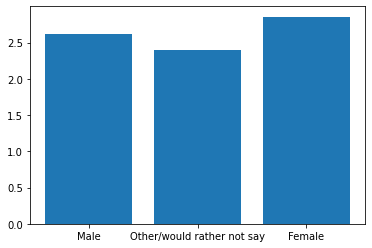

In [54]:
plt.bar(df['Dem_gender'].unique(), df.groupby('Dem_gender')['SLON3_avg'].mean())

In [58]:
df_2 = pd.DataFrame(df.groupby(['Country', 'Dem_gender'])['SLON3_avg'].mean()).reset_index()
df_2

,Country,Dem_gender,SLON3_avg
0,Argentina,Female,2.664983
1,Argentina,Male,2.483946
2,Argentina,Other/would rather not say,2.843137
3,Australia,Female,2.815412
4,Australia,Male,2.491228
...,...,...,...
117,United Kingdom,Male,2.531714
118,United Kingdom,Other/would rather not say,2.809524
119,United States,Female,2.698094
120,United States,Male,2.532015


In [74]:
df_3 = df_2[df_2['Dem_gender'] != 'Other/would rather not say']
df_3

,Country,Dem_gender,SLON3_avg
0,Argentina,Female,2.664983
1,Argentina,Male,2.483946
3,Australia,Female,2.815412
4,Australia,Male,2.491228
6,Austria,Female,2.878995
...,...,...,...
114,Turkey,Male,2.711240
116,United Kingdom,Female,2.725612
117,United Kingdom,Male,2.531714
119,United States,Female,2.698094


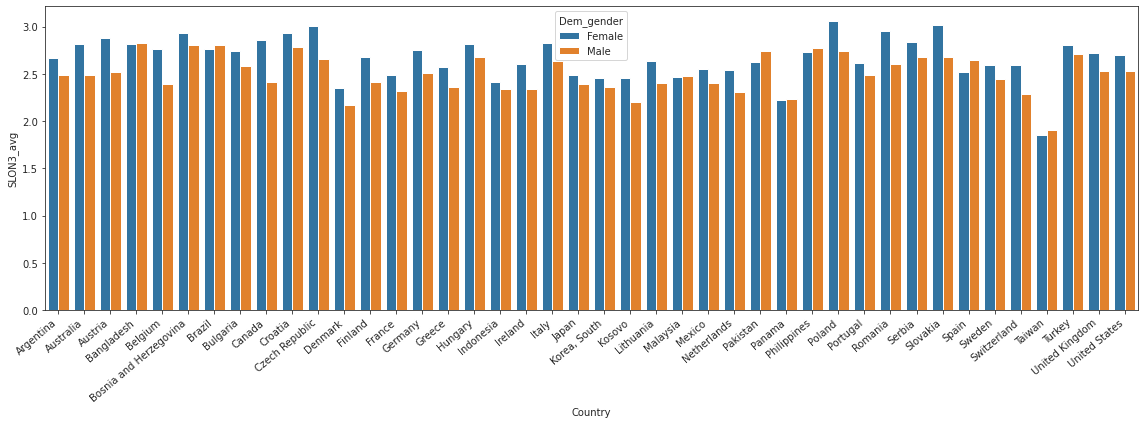

In [77]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x='Country', y='SLON3_avg',data=df_3,hue='Dem_gender')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()


KeyError: 'Column not found: PSS_10'